#  

# <center> <font color = green > Zirconia </font>   </center> 


#  

#  

## <center> Summary </center>
<br/>
<br/>
<br/>
<br/>

### <center> <font color = blue > Case Study : Linear Regression </font> </center>

<br/>
<br/>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; __You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. The dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots.__ 



<br/>
<br/>



&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; __You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.__

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


<br/>
<br/>


## <center> <font color = blue >Questions</font>   </center> 

<br/>
<br/>

<br/>
<br/>


1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.


<br/>
<br/>


1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?


<br/>
<br/>



1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.


<br/>
<br/>



1.4 Inference: Basis on these predictions, what are the business insights and recommendations.



<br/>
<br/>













<br/>
<br/>

<br/>
<br/>

<br/>
<br/>

<br/>
<br/>

### <center> Data Dictionary </center>

<br/>
<br/>
<br/>
<br/>

__Carat__ :	 Carat weight of the cubic zirconia.

<br/>
<br/>

__Cut__	: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

<br/>
<br/>

__Color__ :	 Colour of the cubic zirconia.With D being the best and J the worst.

<br/>
<br/>

__Clarity__	: cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

<br/>
<br/>

__Depth__ :	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

<br/>
<br/>

__Table__ :	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

<br/>
<br/>


__Price__ :	 the Price of the cubic zirconia.

<br/>
<br/>

__X__ :	 Length of the cubic zirconia in mm.

<br/>
<br/>

__Y__ :	 Width of the cubic zirconia in mm.

<br/>
<br/>

__Z__ :	 Height of the cubic zirconia in mm.

<br/>
<br/>

<br/>
<br/>

<br/>
<br/>
<br/>
<br/>

<br/>


***

<br/>
<br/>

<br/>
<br/>


<br />
<br />
<br />
<br />

# <center> Preliminary Analysis of the Dataset </center>  

<br />
<br />

In [1]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns 

sns.set(color_codes = True)


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Q) 1.1 Read the data and do exploratory data analysis. Describe the data briefly. 

### (Check the null values, Data types, shape, EDA). 

### Perform Univariate and Bivariate Analysis.

<br/>
<br/>
<br/>


In [2]:
z_df = pd.read_csv("D:\\New Download - 2019\\Great Learning 2020\\Data Sets\\Cubic_Zirconia.csv")


z_df.head() 

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#  

<br/>

#### Removing the Serial number column

In [3]:
z_df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [4]:
z_df.head() 

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#  

<br/>

#### Renaming the columns for better representation and understanding

In [5]:
z_df.rename(columns = {'carat': 'Carat', 'cut': 'Cut','color':'Color','depth':'Depth','table':'Table_Width','x':'Length','y':'Width','z':'Height'}, inplace = True)

In [6]:
z_df.rename(columns = {'price': 'Price'}, inplace = True)

In [7]:
z_df.head() 

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#  

In [8]:
z_df.shape

(26967, 10)

#  

In [9]:
z_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
Depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
Table_Width,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
Length,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
Width,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
Height,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
Price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


#  

<br>

#### Checking the Data types 

In [10]:
z_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
Carat          26967 non-null float64
Cut            26967 non-null object
Color          26967 non-null object
clarity        26967 non-null object
Depth          26270 non-null float64
Table_Width    26967 non-null float64
Length         26967 non-null float64
Width          26967 non-null float64
Height         26967 non-null float64
Price          26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#   

<br/>

#### Checking for Null or NaN values 

#### As we can see there is a discrepancy in the "Depth" column 

In [11]:
26967 - 26270

697

#   

In [12]:
z_df.isna().sum()

Carat            0
Cut              0
Color            0
clarity          0
Depth          697
Table_Width      0
Length           0
Width            0
Height           0
Price            0
dtype: int64

#   

#   

In [13]:
z_df.isnull().sum()

Carat            0
Cut              0
Color            0
clarity          0
Depth          697
Table_Width      0
Length           0
Width            0
Height           0
Price            0
dtype: int64

#### We can see that we are able to get the same number - 697

#### When we run the Not a Number and Null codes.

#### This indicates the presence of NaN or Null values. 

<br/>

<br/>

In [14]:
z_df.shape

(26967, 10)

#### We have 26,967 values and in that 627 are NaN. 

#### Checking what percentage of NaN values we have, 

In [15]:
(697/26967)*100

2.5846404865205623


#### It is around 2% of our Dataset. 

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


<br>
<br>
<br>
<br>
<br>
<br>


## <center> <font color = blue > Univariate Analysis  </font></center>

<br>

In [16]:
z_df.head(10)

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


#   

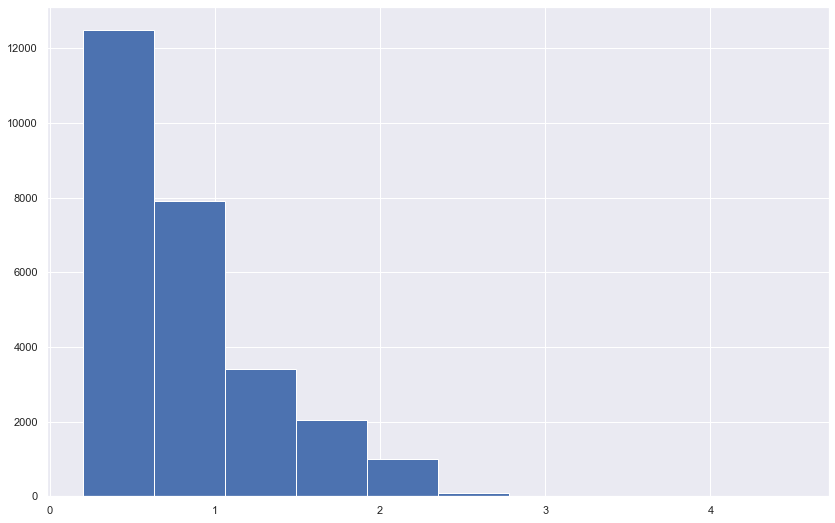

In [17]:
plt.figure(figsize=(14,9))

z_df["Carat"].hist()

<br/>


## <font color = green > Obervation :- </font>
<br/>
<br/>

### `Carat` - it is the unit of measurement, which is used to measure the

### physical __weight of a diamond__, but here it is used to measure the 

### weight of Zirconia.

<br/>
<br/>
<br/>

### 1 Carat is equal to 0.200 grams or 1/5th of a gram. 


<br/>
<br/>
<br/>


### From the graph we can note that, as the Carat increases the number of 

### Zirconia is significantly decreasing. 


<br/>
<br/>
<br/>


### We know now, that there are less number of Zirconia that are 2 Carats and above. 




<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [18]:
z_df.columns

Index(['Carat', 'Cut', 'Color', 'clarity', 'Depth', 'Table_Width', 'Length',
       'Width', 'Height', 'Price'],
      dtype='object')

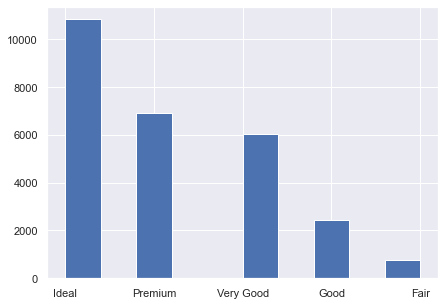

In [19]:
plt.figure(figsize=(7,5))

z_df["Cut"].hist()

<br/>
<br/>
<br/>
<br/>

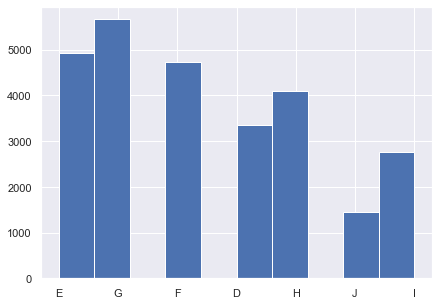

In [20]:
plt.figure(figsize=(7,5))

z_df["Color"].hist()

<br/>
<br/>
<br/>
<br/>

In [21]:
z_df["clarity"].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

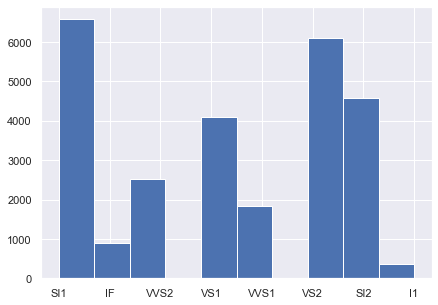

In [22]:
plt.figure(figsize=(7,5))

z_df["clarity"].hist()

<br/>
<br/>
<br/>
<br/>

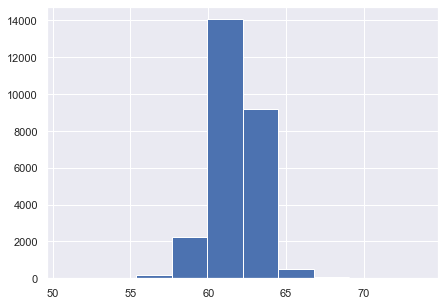

In [23]:
plt.figure(figsize=(7,5))

z_df["Depth"].hist()

<br/>
<br/>
<br/>
<br/>

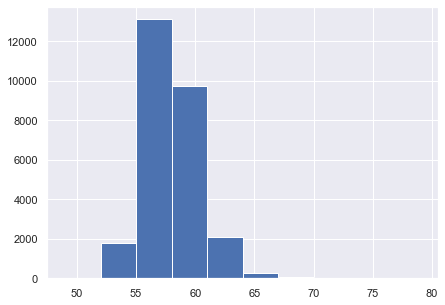

In [24]:
plt.figure(figsize=(7,5))

z_df["Table_Width"].hist()

<br/>
<br/>
<br/>
<br/>

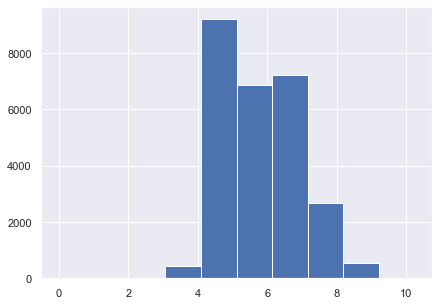

In [25]:
plt.figure(figsize=(7,5))

z_df["Length"].hist()

<br/>
<br/>
<br/>
<br/>

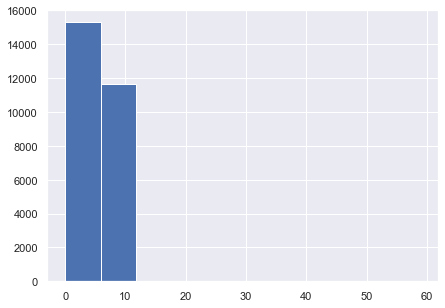

In [26]:
plt.figure(figsize=(7,5))

z_df["Width"].hist()

<br/>
<br/>
<br/>
<br/>

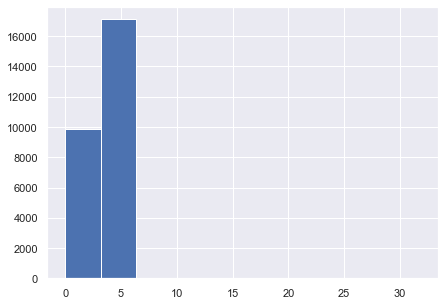

In [27]:
plt.figure(figsize=(7,5))

z_df["Height"].hist()

<br/>
<br/>
<br/>
<br/>

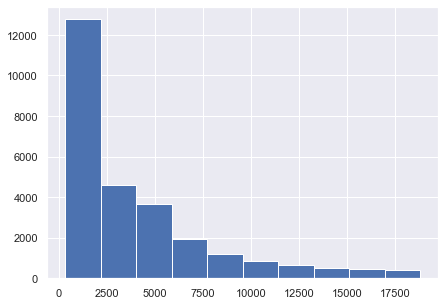

In [28]:
plt.figure(figsize=(7,5))

z_df["Price"].hist()

<br/>
<br/>
<br/>

## <font color = green > Obervation :- </font>
<br/>
<br/>


### Cut -  `Ideal Cut` is the Highest number and then we have the `Premium Cut` and `Very Good Cut`.

### Fair Cut is the lowest in number.



<br/>
<br/>
<br/>
<br/>
<br/>

### Color -  'D' is the best and 'J' the worst when it comes to color. 

### Here, 'G' is the Highest and 'J' the least in number, when it comes to colour availability of Zirconia.  



<br/>
<br/>
<br/>
<br/>
<br/>

### Clarity - In order from Best to Worst, we have labels based on Clarity -  FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.

### Here, the best is FL = Flawless and the least in Clarity is I3 = Level 3 inclusions.

### The Highest in number is `SI1` and the least in number is `I1`. 


<br/>
<br/>
<br/>
<br/>
<br/>


### Depth - The Height of a Cubic Zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.


### From the graph, we can say that the Height range lies between 55 - 69. 


### Highest number of Cubic Zirconia's have a Height of range between 60-65. 




<br/>
<br/>
<br/>
<br/>
<br/>

### Table_Width - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.


### The Width range lies between 52 - 69. 


### Highest number lies in the range of 55 - 60.



<br/>
<br/>
<br/>
<br/>
<br/>

### Length - Length of the cubic zirconia in mm.


### From the graph we can note that the range lies between 3 - 9. 

### High number of Zirconia, lie in the range of 4 - 7.  


<br/>
<br/>
<br/>
<br/>
<br/>

### Width - Width of the cubic zirconia in mm.

### From the graph we can note that the Width range lies between 0 - 10.

<br/>
<br/>
<br/>
<br/>
<br/>

### Height - Height of the cubic zirconia in mm.


### From the graph we can note that the Height range lies between 0 - 7.

<br/>
<br/>
<br/>
<br/>
<br/>

### Price -  as the Price goes higher the number of Zirconia available is decreasing. 

### The Highest number of Zirconia is available in the Price range of 0 - 2500.



<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>





<br>
<br>
<br>


## <center> <font color = blue >  Bivariate Analysis  </font></center>

<br>

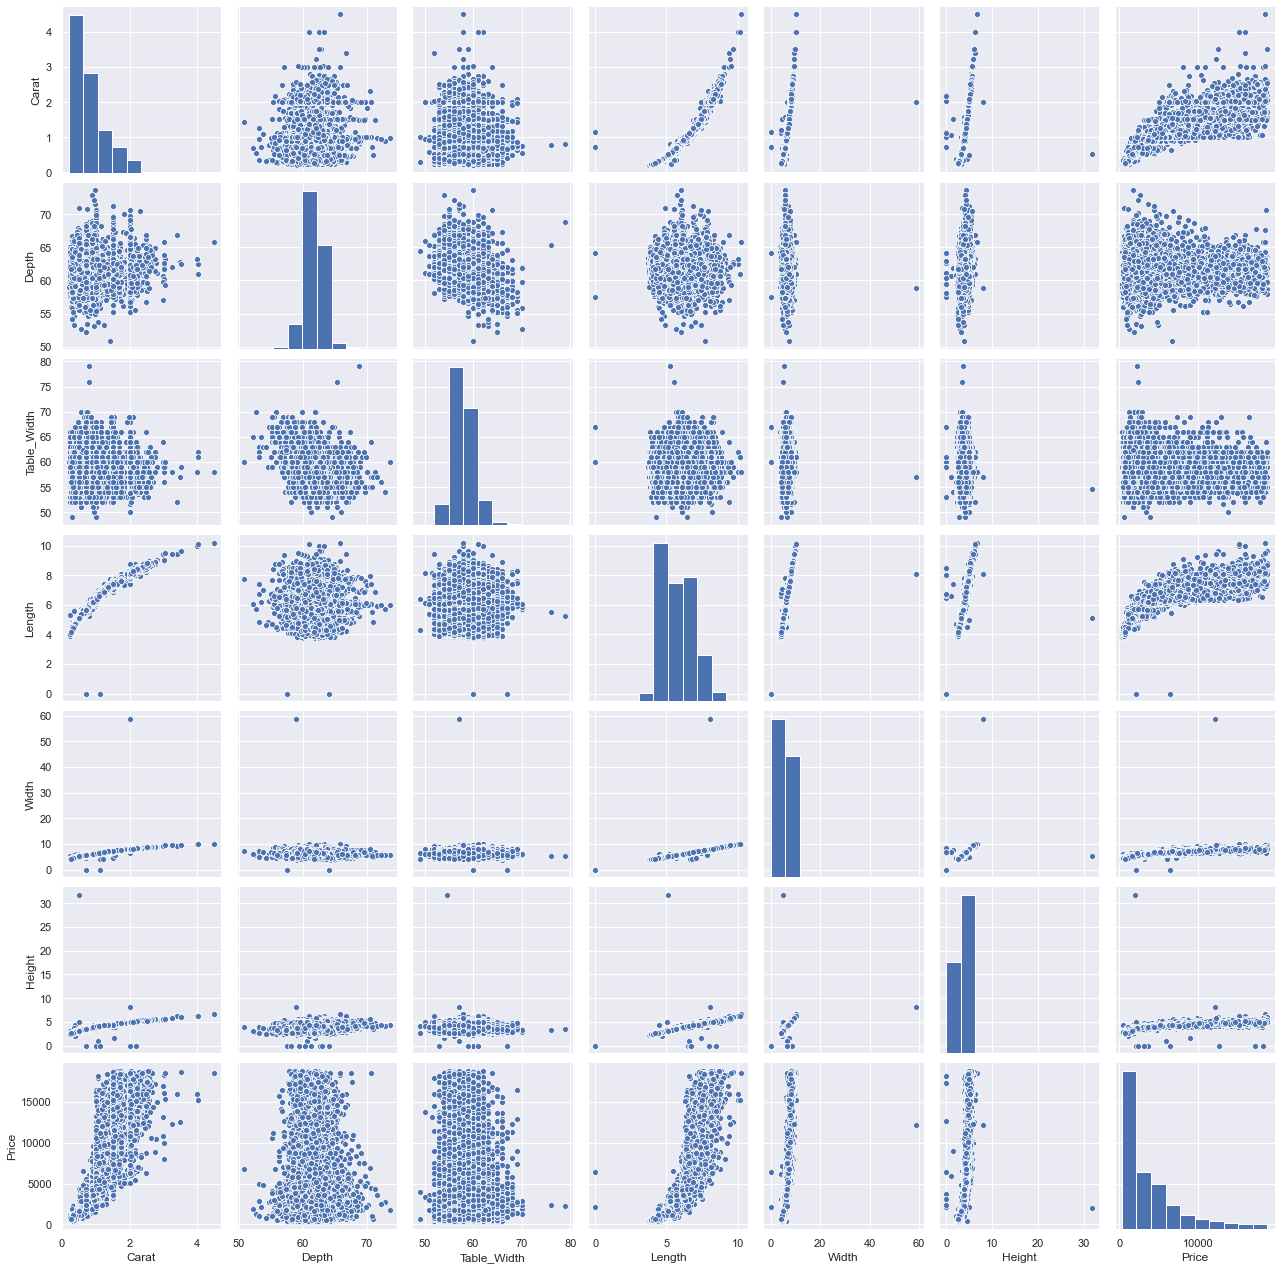

In [29]:
sns.pairplot(z_df)

<br/>

<br>
<br>

### Correlation &nbsp; Heatmap


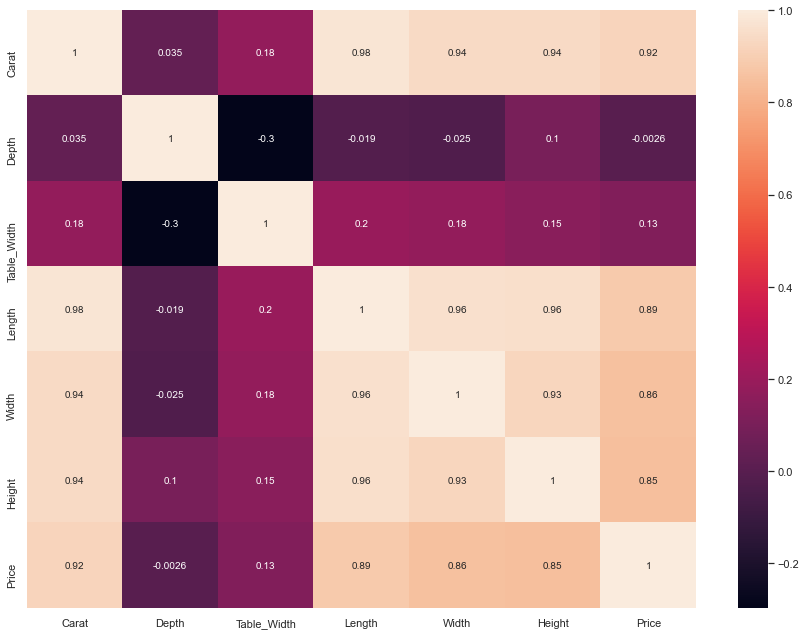

In [30]:
correlation = z_df.corr()


plt.figure(figsize=(15,11))


sns.heatmap(correlation,annot = True)

<br/>
<br/>
<br/>

## <font color = green > Obervation :- </font>
<br/>
<br/>


### Based on the Pairplot and Correlation Heatmap, we are going deduct Bivariate

### relationship amongst the variables. 



<br/>
<br/>
<br/>
<br/>

### We are talking about 1 stone and its various features like Weight, Height, Width 

### and so on. So, there is a High chance that these features(columns) will share 

### a degree of correlation with each other. 


<br/>
<br/>
<br/>
<br/>


### Depth represents Height of a Cubic Zirconia and Table_Width represents 

### its Width. It is noted that these 2 features has a Negative Correlation 

### with all the other features.

<br/>
<br/>
<br/>
<br/>


### Variables with Postive correlation as noted from the Pairplot. Lenght - Price, Carat  - Price and Length - Carat.  


<br/>
<br/>
<br/>
<br/>


### The Highest Correlation is 98%which is between Length and Carat. 

<br/>
<br/>
<br/>
<br/>



### The Lowest Correlation is  "- 3%",  which is between Depth and Table_Width. 


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


***
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Q) 1.2  a. Impute null values if present, also check for the values which are equal 

### to zero. 

### b. Do they have any meaning or do we need to change them or drop them? 

### c. Do you think scaling is necessary in this case?

<br/>
<br/>


In [31]:
z_df.head(10)

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [32]:
z_df.isnull().sum()

Carat            0
Cut              0
Color            0
clarity          0
Depth          697
Table_Width      0
Length           0
Width            0
Height           0
Price            0
dtype: int64

In [33]:
z_df.isna().sum()

Carat            0
Cut              0
Color            0
clarity          0
Depth          697
Table_Width      0
Length           0
Width            0
Height           0
Price            0
dtype: int64

In [34]:
z_df['Depth'].nunique()

169

<br>
<br>
<br>

#### The Rows which have Null or NaN values  

In [35]:
z_df[z_df['Depth'].isnull()].head(15)

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
185,0.43,Ideal,E,SI1,NaN,56.0,4.82,4.79,3.01,975
258,0.41,Ideal,I,IF,NaN,57.0,4.78,4.81,2.93,953
313,0.71,Premium,F,VS1,NaN,58.0,5.71,5.67,3.57,2879
344,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.80,1970
367,0.29,Very Good,I,VS2,NaN,55.0,4.25,4.27,2.66,384


<br/>
<br/>
<br/>
<br/>

#### Checking if there are any "Depth" values equal to "0"

In [36]:
z_df['Depth'].value_counts().head()

62.0    1131
61.9    1091
62.1    1016
61.8    1012
62.2     977
Name: Depth, dtype: int64

In [37]:
z_df[z_df.Depth == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


<br/>
<br/>
<br/>
<br/>

In [38]:
z_df[z_df.Depth == "0.0"]

C:\Users\shreyas\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


In [39]:
z_df.columns

Index(['Carat', 'Cut', 'Color', 'clarity', 'Depth', 'Table_Width', 'Length',
       'Width', 'Height', 'Price'],
      dtype='object')

In [40]:
z_df[z_df.Carat == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


In [41]:
z_df[z_df.Cut == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


In [42]:
z_df[z_df.Color == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


In [43]:
z_df[z_df.clarity == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


In [44]:
z_df[z_df.Table_Width == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


In [45]:
z_df[z_df.Length == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [46]:
z_df[z_df.Width == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [47]:
z_df[z_df.Height == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [48]:
z_df[z_df.Price == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


<br/>
<br/>

<br/>
<br/>
<br/>
<br/>

### From the above output we can note that there are no "Depth" values 

### that are equal to "0". 

<br/>
<br/>
<br/>
<br/>


### Length - there are 3 values in this column which are "0".

<br/>
<br/>
<br/>
<br/>


### Width - there are 3 values in this column which are "0".

<br/>
<br/>
<br/>
<br/>

### Height - there are 9 values in this column which are "0".


<br/>
<br/>
<br/>
<br/>




<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### <center> We will now start with the Imputation process </center>

<br/>
<br/>


#### We have NaN values and as requested we are now going to Impute them. 

In [49]:
z_df.isna().sum()

Carat            0
Cut              0
Color            0
clarity          0
Depth          697
Table_Width      0
Length           0
Width            0
Height           0
Price            0
dtype: int64

#   

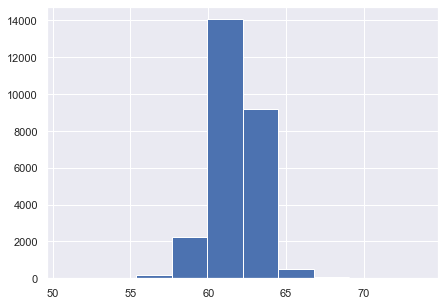

In [50]:
plt.figure(figsize=(7,5))

z_df["Depth"].hist()

#### From, the graph we can note that the distribution is Uni-Modal. 

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [51]:
z_df['Depth'].mean()

61.745146555006194

In [52]:
z_df['Depth'].mode()

0    62.0
dtype: float64

<br/>

### The number '62' has the Highest number of occurence.

### The Mean and the Mode value are similar.

### Therefore, we will use the same for our imputation for Depth Variable.  


<br/>
<br/>
<br/>
<br/>




In [53]:
z_df.isna().sum()

Carat            0
Cut              0
Color            0
clarity          0
Depth          697
Table_Width      0
Length           0
Width            0
Height           0
Price            0
dtype: int64

In [54]:

z_df['Depth'].fillna(z_df['Depth'].mode()[0], inplace=True)


In [55]:
z_df.isna().sum()

Carat          0
Cut            0
Color          0
clarity        0
Depth          0
Table_Width    0
Length         0
Width          0
Height         0
Price          0
dtype: int64


### We have now, removed NaN values from the Datset and at the same time replaced them by the Mode of that column.

<br/>
<br/>
<br/>
<br/>

### We will now do the same with the '0' values in the Dataset,  which is that we will replace them with the Mode value of that variable. 


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [56]:
z_df['Length'].median()

5.69

In [57]:
z_df['Length'].mean()

5.729853524678309

In [58]:
z_df[z_df.Length == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [59]:

z_df.Length.replace(0,z_df.Length.median(), inplace = True) 


In [60]:
z_df[z_df.Length == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


#   

In [61]:
z_df['Width'].median()

5.71

In [62]:
z_df['Width'].mean()

5.733568806318799

In [63]:
z_df['Height'].median()

3.52

In [64]:
z_df['Height'].mean()

3.5380572551637184

In [65]:

z_df.Width.replace(0,z_df.Width.median(), inplace = True) 

z_df.Height.replace(0,z_df.Height.median(), inplace = True) 


In [66]:
z_df[z_df.Width == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


#  

In [67]:
z_df[z_df.Height == 0.0]

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price


#  

### For the '0' values present in continuous variables like, &nbsp; "Length",&nbsp;  "Width" &nbsp; and &nbsp;  "Height", we have performed imputation. 

<br/>
<br/>
<br/>
<br/>


### It can be noted, that the Mean and Median values for these columns are similar to each other.  

<br/>
<br/>
<br/>
<br/>


### We have chosen to perform the Imputation using the Median value. 



<br/>
<br/>
<br/>
<br/>

<br/>
<br/>
<br/>
<br/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

<br/>
<br/>
<br/>
<br/>

### Q 1.2) c. &nbsp; Do you think scaling is necessary in this case ?

<br/>
<br/>

#### Let, us view our dataset. 

In [68]:
z_df.head(10)

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [69]:
z_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat,26967.0,0.798375,0.477745,0.20,0.40,0.70,1.05,4.50
Depth,26967.0,61.751734,1.395068,50.80,61.10,61.90,62.50,73.60
Table_Width,26967.0,57.456080,2.232068,49.00,56.00,57.00,59.00,79.00
Length,26967.0,5.730487,1.126897,3.73,4.71,5.69,6.55,10.23
Width,26967.0,5.734204,1.164488,3.71,4.72,5.71,6.54,58.90
Height,26967.0,3.539232,0.717718,1.07,2.90,3.52,4.04,31.80
Price,26967.0,3939.518115,4024.864666,326.00,945.00,2375.00,5360.00,18818.00


<br/>
<br/>

### These are the numerical colums in our dataset. 

<br/>
<br/>
<br/>
<br/>

### It can be noted here that columns Carat, Length and Price have different scales. 

<br/>
<br/>
<br/>
<br/>

### When we are building a model we need to assure that the every column has 

### equal weight and the numerical scale of that column does not play a role in  

### giving that column a more higher weightage in the model.  

<br/>
<br/>
<br/>
<br/>

### For this reason, in this case, <font color = blue >Scaling is necessary.</font>   

<br/>
<br/>

<br/>
<br/>
<br/>
<br/>

<br/>
<br/>



In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
SS = StandardScaler()

In [72]:
z_df.head()

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [73]:
z_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat,26967.0,0.798375,0.477745,0.20,0.40,0.70,1.05,4.50
Depth,26967.0,61.751734,1.395068,50.80,61.10,61.90,62.50,73.60
Table_Width,26967.0,57.456080,2.232068,49.00,56.00,57.00,59.00,79.00
Length,26967.0,5.730487,1.126897,3.73,4.71,5.69,6.55,10.23
Width,26967.0,5.734204,1.164488,3.71,4.72,5.71,6.54,58.90
Height,26967.0,3.539232,0.717718,1.07,2.90,3.52,4.04,31.80
Price,26967.0,3939.518115,4024.864666,326.00,945.00,2375.00,5360.00,18818.00


<br/>
<br/>

### There are total 10 columns. Out of which 7 columns are numeric columns. 

<br/>
<br/>

### We will extract numeric columns and and perfrom scaling on the columns. 

<br/>
<br/>

In [74]:
num_z_df = z_df[['Carat', 'Depth', 'Table_Width','Length','Width','Height','Price']].copy()


num_z_df.head()

,Carat,Depth,Table_Width,Length,Width,Height,Price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


<br/>
<br/>

### Before Scaling let us now check for Outliers. 

<br/>

### Outliers impact Scaling and also the Regression output. 

<br/>
<br/>

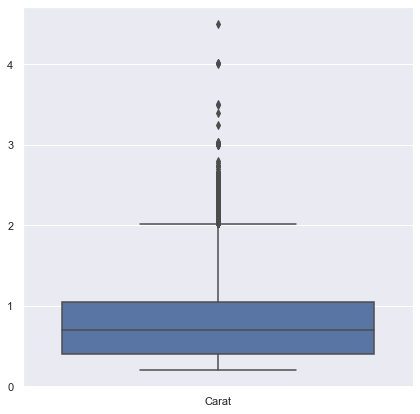

In [75]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Carat']]); 

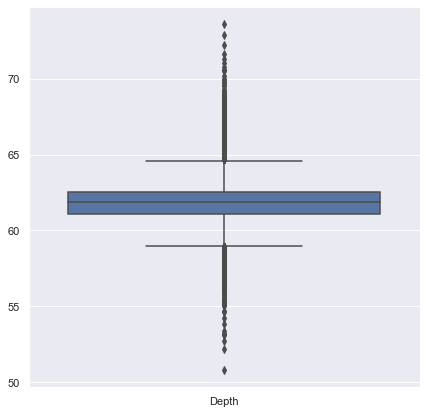

In [76]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Depth']]); 

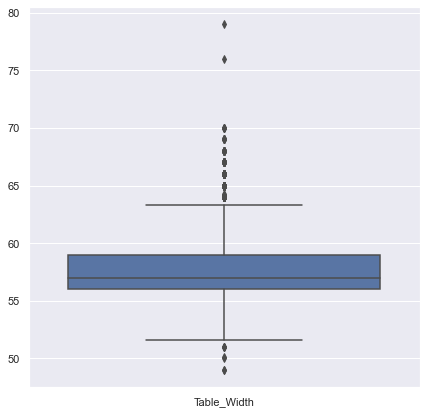

In [77]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Table_Width']]); 

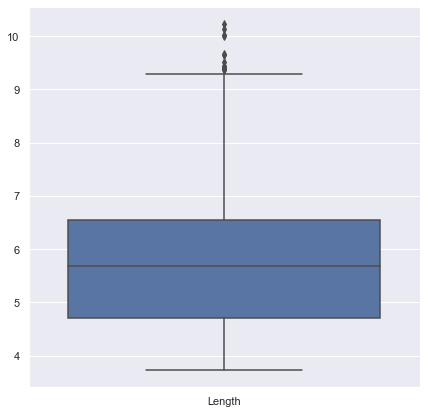

In [78]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Length']]); 

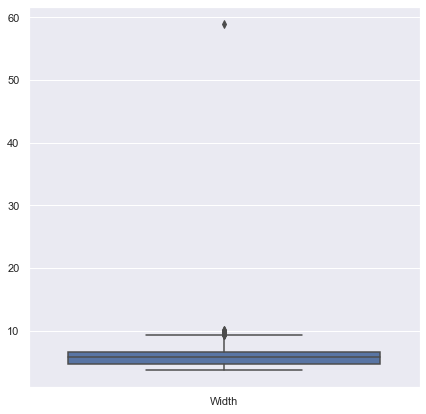

In [79]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Width']]); 

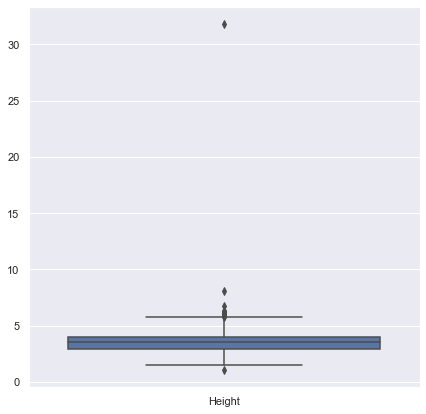

In [80]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Height']]); 

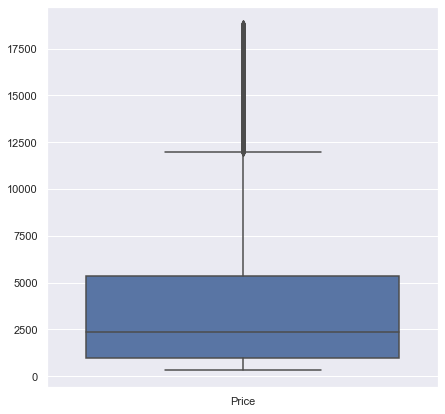

In [81]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Price']]); 

<br/>
<br/>

### Every Numeric Column has Outlier. 

<br/>
<br/>
<br/>

### The Outlier here are justified like Carat or Price, but if they are kept they will impact 

### the Scaling and the regression which might lead to in-accurate model. 

<br/>
<br/>
<br/>

### Therefore, we are proceeding with the Outlier treatment.  

<br/>
<br/>


In [82]:
Q1 = num_z_df.quantile(0.25)
Q3 = num_z_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Carat             0.65
Depth             1.40
Table_Width       3.00
Length            1.84
Width             1.82
Height            1.14
Price          4415.00
dtype: float64


In [83]:


# Replace every outlier on the lower side by the lower whisker

for i, j in zip(np.where(num_z_df < Q1 - 1.5 * IQR)[0], np.where(num_z_df < Q1 - 1.5 * IQR)[1]):
    whisker  = Q1 - 1.5 * IQR
    num_z_df.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    

for i, j in zip(np.where(num_z_df > Q3 + 1.5 * IQR)[0], np.where(num_z_df > Q3 + 1.5 * IQR)[1]):
    whisker  = Q3 + 1.5 * IQR
    num_z_df.iloc[i,j] = whisker[j]
    

<br/>
<br/>


### Let, us check the Outliers of a few Columns 

<br/>
<br/>

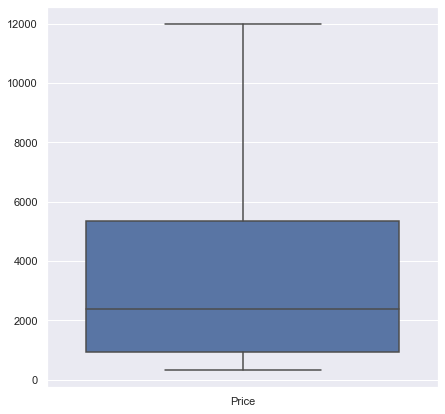

In [84]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Price']]); 

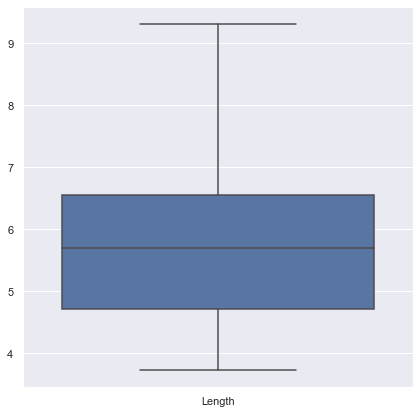

In [85]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Length']]); 

<br/>
<br/>


### It looks clean let us now proceed with the Scaling

<br/>
<br/>

In [86]:
num_z_df.head()

,Carat,Depth,Table_Width,Length,Width,Height,Price
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0


In [87]:
scaled_z_df = SS.fit_transform(num_z_df)

In [88]:
scaled_z_df

array([[-1.06740742,  0.28234516,  0.26160337, ..., -1.28973205,
        -1.26164959, -0.93318308],
       [-1.00253165, -0.78363971,  0.26160337, ..., -1.13770507,
        -1.20417378, -0.79344681],
       [ 0.23010808,  0.364344  ,  1.18878038, ...,  0.34679364,
         0.347673  ,  0.73500873],
       ...,
       [-0.613277  , -0.04565018,  0.26160337, ..., -0.5206544 ,
        -0.52883305, -0.59983284],
       [-1.1322832 ,  0.03634865, -0.66557364, ..., -1.37021692,
        -1.3478633 , -0.88045785],
       [ 0.98699213,  0.20034632,  0.26160337, ...,  1.02644366,
         1.05175163,  0.41145443]])

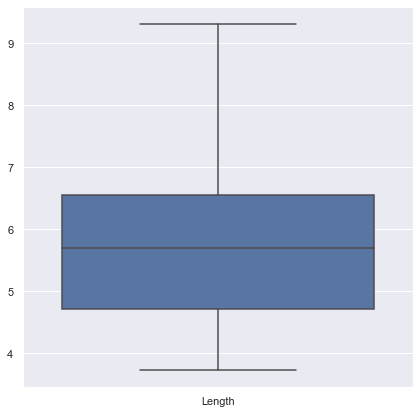

In [89]:
plt.figure(figsize=(7,7))

sns.boxplot(data = num_z_df[['Length']]); 

<br/>
<br/>


### Outlier treatment and the Scaling has been done. 

<br/>
<br/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


### Q1.3) a. Encode the data (having string values) for Modelling.

### b. Data Split: Split the data into test and train (70:30). 

### c. Apply Linear regression. 

### d. Performance Metrics: Check the performance of Predictions on Train and

###  Test sets using Rsquare, RMSE.


<br/>
<br/>




<br/>
<br/>
<br/>
<br/>
<br/>

### <center> Encoding the String Columns </center>

In [90]:
z_df.head() 

,Carat,Cut,Color,clarity,Depth,Table_Width,Length,Width,Height,Price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [91]:
z_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat,26967.0,0.798375,0.477745,0.20,0.40,0.70,1.05,4.50
Depth,26967.0,61.751734,1.395068,50.80,61.10,61.90,62.50,73.60
Table_Width,26967.0,57.456080,2.232068,49.00,56.00,57.00,59.00,79.00
Length,26967.0,5.730487,1.126897,3.73,4.71,5.69,6.55,10.23
Width,26967.0,5.734204,1.164488,3.71,4.72,5.71,6.54,58.90
Height,26967.0,3.539232,0.717718,1.07,2.90,3.52,4.04,31.80
Price,26967.0,3939.518115,4024.864666,326.00,945.00,2375.00,5360.00,18818.00


<br/>
<br/>

### The Columns which require encoding - `Cut`, `Color` and `Clarity`.

<br/>

In [92]:
Cut = pd.get_dummies(z_df.Cut)

Cut.head(10)

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,1,0,0,0
7,0,0,0,1,0
8,0,1,0,0,0
9,0,0,1,0,0


In [93]:
Color = pd.get_dummies(z_df.Color)

Color.head(10)

,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0


In [94]:
Clarity = pd.get_dummies(z_df.clarity)

Clarity.head(10)

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0,0
9,0,0,0,0,0,1,0,0


<br/>
<br/>
<br/>
<br/>
<br/>


In [95]:
merge_df = pd.concat([Clarity,Color,Cut,num_z_df],axis = 'columns')

merge_df.head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,D,E,...,Ideal,Premium,Very Good,Carat,Depth,Table_Width,Length,Width,Height,Price
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0.31,60.4,59.0,4.35,4.43,2.65,779.0


<br/>
<br/>
<br/>
<br/>

In [96]:
merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
I1,26967.0,0.013535,0.115552,0.00,0.00,0.00,0.00,1.000
IF,26967.0,0.033152,0.179036,0.00,0.00,0.00,0.00,1.000
SI1,26967.0,0.243668,0.429303,0.00,0.00,0.00,0.00,1.000
SI2,26967.0,0.169652,0.375334,0.00,0.00,0.00,0.00,1.000
VS1,26967.0,0.151778,0.358812,0.00,0.00,0.00,0.00,1.000
VS2,26967.0,0.226165,0.418355,0.00,0.00,0.00,0.00,1.000
VVS1,26967.0,0.068194,0.252084,0.00,0.00,0.00,0.00,1.000
VVS2,26967.0,0.093855,0.291633,0.00,0.00,0.00,0.00,1.000
D,26967.0,0.124003,0.329592,0.00,0.00,0.00,0.00,1.000
E,26967.0,0.182334,0.386127,0.00,0.00,0.00,0.00,1.000


<br/>
<br/>
<br/>
<br/>

In [97]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 27 columns):
I1             26967 non-null uint8
IF             26967 non-null uint8
SI1            26967 non-null uint8
SI2            26967 non-null uint8
VS1            26967 non-null uint8
VS2            26967 non-null uint8
VVS1           26967 non-null uint8
VVS2           26967 non-null uint8
D              26967 non-null uint8
E              26967 non-null uint8
F              26967 non-null uint8
G              26967 non-null uint8
H              26967 non-null uint8
I              26967 non-null uint8
J              26967 non-null uint8
Fair           26967 non-null uint8
Good           26967 non-null uint8
Ideal          26967 non-null uint8
Premium        26967 non-null uint8
Very Good      26967 non-null uint8
Carat          26967 non-null float64
Depth          26967 non-null float64
Table_Width    26967 non-null float64
Length         26967 non-null float64
Width          2696

<br/>
<br/>

### There are '27' columns in the Dataset, after Encoding now all the Columns are 

### numeric in nature.  

<br/>
<br/>
<br/>
<br/>

<br/>
<br/>


### <center>b. Split the data into Test and Train set (70:30) </center>

In [108]:
from sklearn.model_selection import train_test_split


X = merge_df.drop(['Price'],axis=1)

Y = merge_df.pop('Price')

KeyError: "['Price'] not found in axis"

<br/>
<br/>

#### Predictor Variables

In [99]:
X.head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,D,E,...,Good,Ideal,Premium,Very Good,Carat,Depth,Table_Width,Length,Width,Height
0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0.30,62.1,58.0,4.27,4.29,2.66
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0.33,60.8,58.0,4.42,4.46,2.70
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0.90,62.2,60.0,6.04,6.12,3.78
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0.42,61.6,56.0,4.82,4.80,2.96
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0.31,60.4,59.0,4.35,4.43,2.65


<br/>
<br/>

#### Target Variable

In [100]:
Y.head()

0     499.0
1     984.0
2    6289.0
3    1082.0
4     779.0
Name: Price, dtype: float64

<br/>
<br/>
<br/>

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [110]:
X_train.head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,D,E,...,Good,Ideal,Premium,Very Good,Carat,Depth,Table_Width,Length,Width,Height
11687,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0.41,62.3,56.0,4.77,4.73,2.96
9728,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1.71,62.8,57.0,7.58,7.55,4.75
1936,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0.33,61.8,62.0,4.40,4.45,2.74
26220,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0.70,62.8,57.0,5.61,5.66,3.54
18445,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0.70,62.1,56.0,5.67,5.71,3.53


In [111]:
y_train.head()

11687    1061.0
9728     6320.0
1936      536.0
26220    2214.0
18445    2575.0
Name: Price, dtype: float64

<br>

### Train and Test split has been done. 

<br>
<br>

<br/>
<br/>
<br/>
<br/>
<br/>

### <center> c. &nbsp; Apply Linear regression  </center>

In [112]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

<br/>
<br/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


### d. Performance Metrics: Check the performance of Predictions on Train and

###  Test sets using Rsquare, RMSE.


<br/>
<br/>

####  R Square of the training set

In [113]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9409007907082282


####  R Square of the Test set

In [114]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9404218890590625


<br/>
<br/>
<br/>
<br/>

#### RMSE on Training data

In [117]:
from sklearn import metrics

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)

np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

845.5997107760016

<br/>
<br/>

#### RMSE on Test data

In [118]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

842.8713571652781

<br>

## Based on the above Model Accuracy figures we can with confidence

<br>

## present the company that based on thier input parameters our 
<br>

## Linear Regression Prediction Model will be able to predict the 
<br>

## Expected Price with 90%+ Accuracy.   

<br><br><br><br>



<br><br>

# Completed 